In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [101]:
# Set Max display rows and columns
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [16]:
# Import the data
housing_df = pd.read_csv("Resources/housing_df_clean.csv")
print(housing_df.head(25))
print("Input file has been read in")

    MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig LandSlope  \
0           60       RL         65.0     8450      Reg    Inside       Gtl   
1           20       RL         80.0     9600      Reg       FR2       Gtl   
2           60       RL         68.0    11250      IR1    Inside       Gtl   
3           70       RL         60.0     9550      IR1    Corner       Gtl   
4           60       RL         84.0    14260      IR1       FR2       Gtl   
5           50       RL         85.0    14115      IR1    Inside       Gtl   
6           20       RL         75.0    10084      Reg    Inside       Gtl   
7           60       RL         70.0    10382      IR1    Corner       Gtl   
8           50       RM         51.0     6120      Reg    Inside       Gtl   
9          190       RL         50.0     7420      Reg    Corner       Gtl   
10          20       RL         70.0    11200      Reg    Inside       Gtl   
11          60       RL         85.0    11924      IR1    Inside

In [17]:
# Get shape of housing dataframe
housing_df.shape

(1460, 56)

In [18]:
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold      

In [19]:
# Get dataframe field information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  ExterQua

In [20]:
# Get value counts for all housing_df columns
for col in housing_df.columns:
    print(f'-------------------- {col} START --------------------')
    print(housing_df[col].value_counts(dropna=False))
    print(f'-------------------- {col} END ----------------------')
    print('\n')

print("Value counts for all housing_df columns Complete")

-------------------- MSSubClass START --------------------
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
-------------------- MSSubClass END ----------------------


-------------------- MSZoning START --------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
-------------------- MSZoning END ----------------------


-------------------- LotFrontage START --------------------
LotFrontage
70.0     329
60.0     143
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      1

In [21]:
# List housing dataframe columns
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

## Split into training and testing sets

In [83]:
# Make an X variable with all columns except SalePrice
X = housing_df.drop(columns = ['SalePrice'])
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [84]:
# Set the target variable y
y = housing_df['SalePrice']

In [85]:
# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [86]:
# Create list of category columns that need to be encoded
cols_to_encode = ['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
                  'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional',
                  'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']

# Create an instance of the label encoder
le = LabelEncoder()

# Copy X_train and X_test before encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Fit and transform the label encoder with X_train for each column
# Transform X_test with the label encoder for each column
for col in cols_to_encode:
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])
    
print('---------- X_train_encoded ----------')
print(X_train_encoded.head())
print('\n')
print('---------- X_test_encoded ----------')
print(X_test_encoded.head())

---------- X_train_encoded ----------
      MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
1023         120         3         43.0     3182         3          4   
810           20         3         78.0    10140         3          4   
1384          50         3         60.0     9060         3          4   
626           20         3         70.0    12342         0          4   
813           20         3         75.0     9750         3          4   

      LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  OverallQual  \
1023          0             0           2         4           2            7   
810           0            14           2         0           2            6   
1384          0             7           2         0           0            6   
626           0            12           2         0           2            5   
813           0            12           2         0           2            6   

      OverallCond  YearBuilt  YearRemodAdd

## Train the models

In [95]:
# Create the models
lr1 = LinearRegression()

# Fit the first model to the full training data. 
lr1.fit(X_train_encoded, y_train)


LinearRegression()

## Evaluate the model

In [96]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

# Use our models to make prediction
predicted = lr1.predict(X_test_encoded)

# Score the prediction with mse and r2
mse1 = mean_squared_error(y_test, predicted)
r21 = r2_score(y_test, predicted)

print(f"All Features:")
print(f"mean squared error (MSE): {mse1}")
print(f"R-squared (R2): {r21}")


All Features:
mean squared error (MSE): 1124555735.2613707
R-squared (R2): 0.8394709317091669


In [97]:
# Create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [98]:
# Calculate the adjusted r-squared value of the model
adj_score1 = r2_adj(X_test_encoded, y_test, lr1)
print(f"All Features Adjusted R2: {adj_score1}")


All Features Adjusted R2: 0.8108977965764943


In [99]:
# Examine linear regression on the better training data using cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LinearRegression(), X_train_encoded, y_train, scoring = "r2")
print(f"All scores: {cv_scores}")
print(f"Mean score: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

All scores: [0.81826822 0.15122659 0.80439929 0.85159833 0.88396586]
Mean score: 0.7018916569579627
Standard Deviation: 0.27671156060206814


<Axes: >

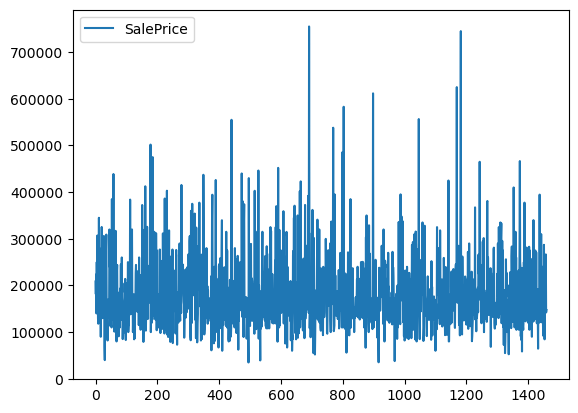

In [94]:
# plot data 
housing_df.plot.line(y='SalePrice', use_index=True)

In [50]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [53]:
X = housing_df.drop(['SalePrice'], axis=1)
y = housing_df['SalePrice']

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [60]:
train_data = X_train.join(y_train)
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
991,70,RM,121.0,17671,Reg,Corner,Gtl,OldTown,Artery,1Fam,2Story,8,9,1882,1986,Gable,Wd Sdng,Wd Sdng,Gd,Gd,BrkTil,TA,TA,No,BLQ,216,700,916,Gd,916,826,1742,0,1,1,4,Gd,8,Typ,1,Gd,Attchd,1925.0,Unf,2,424,TA,TA,0,169,0,11,2009,WD,Normal,168000
1097,120,RL,70.0,3696,Reg,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,8,5,1986,1986,Gable,HdBoard,HdBoard,Gd,TA,CBlock,Gd,TA,No,Unf,0,1074,1074,Ex,1088,0,1088,0,1,1,2,Gd,5,Typ,0,NotAvail,Attchd,1987.0,RFn,2,461,TA,TA,0,74,137,10,2007,WD,Normal,170000
1364,160,FV,30.0,3180,Reg,Inside,Gtl,Somerst,Norm,TwnhsE,2Story,7,5,2005,2005,Gable,MetalSd,MetalSd,Gd,TA,PConc,Gd,TA,No,Unf,0,600,600,Ex,520,600,1200,0,2,1,2,Gd,4,Typ,0,NotAvail,Detchd,2005.0,RFn,2,480,TA,TA,0,166,0,4,2006,WD,Abnorml,144152
887,50,RL,59.0,16466,IR1,Inside,Gtl,Edwards,Norm,1Fam,1.5Fin,5,7,1955,1955,Gable,MetalSd,MetalSd,TA,Gd,PConc,TA,TA,No,Unf,0,816,816,TA,872,521,1393,0,1,1,3,TA,8,Typ,0,NotAvail,Attchd,1955.0,Unf,1,300,TA,TA,121,0,0,4,2008,WD,Normal,135500
307,50,RM,70.0,7920,IR1,Inside,Gtl,IDOTRR,Artery,1Fam,1.5Fin,6,7,1920,1950,Gable,MetalSd,MetalSd,TA,Fa,CBlock,TA,TA,No,Unf,0,319,319,TA,1035,371,1406,0,1,0,3,Fa,6,Typ,0,NotAvail,NotAvail,1920.0,NotAvail,0,0,NotAvail,NotAvail,0,144,0,3,2008,WD,Normal,89500
1045,20,RL,70.0,13680,IR1,CulDSac,Gtl,Edwards,Norm,1Fam,1Story,3,5,1955,1955,Hip,BrkFace,Wd Sdng,TA,TA,Slab,NotAvail,NotAvail,NotAvail,NotAvail,0,0,0,Ex,1733,0,1733,0,2,0,4,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2,452,TA,TA,0,0,0,6,2009,WD,Normal,139600
435,60,RL,43.0,10667,IR2,CulDSac,Gtl,CollgCr,PosN,1Fam,2Story,7,6,1996,1996,Gable,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,385,70,799,Ex,827,834,1661,1,2,1,3,Gd,6,Typ,1,TA,Attchd,1996.0,RFn,2,550,TA,TA,158,61,0,4,2009,ConLw,Normal,212000
6,20,RL,75.0,10084,Reg,Inside,Gtl,Somerst,Norm,1Fam,1Story,8,5,2004,2005,Gable,VinylSd,VinylSd,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,317,1686,Ex,1694,0,1694,1,2,0,3,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,255,57,0,8,2007,WD,Normal,307000
1434,20,RL,80.0,17400,Reg,Inside,Mod,Mitchel,Norm,1Fam,1Story,5,5,1977,1977,Gable,BrkFace,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,936,190,1126,Fa,1126,0,1126,1,2,0,3,TA,5,Typ,1,Gd,Attchd,1977.0,RFn,2,484,TA,TA,295,41,0,5,2006,WD,Normal,160000
1160,160,RL,24.0,2280,Reg,Inside,Gtl,NPkVill,Norm,Twnhs,2Story,6,5,1978,1978,Gable,Plywood,Brk Cmn,TA,TA,CBlock,Gd,TA,No,ALQ,311,544,855,Fa,855,601,1456,0,2,1,3,TA,7,Typ,1,TA,Attchd,1978.0,Unf,2,440,TA,TA,26,0,0,7,2010,WD,Normal,146000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageYrBlt'}>],
       [<Axes: title={'center': 'Gara

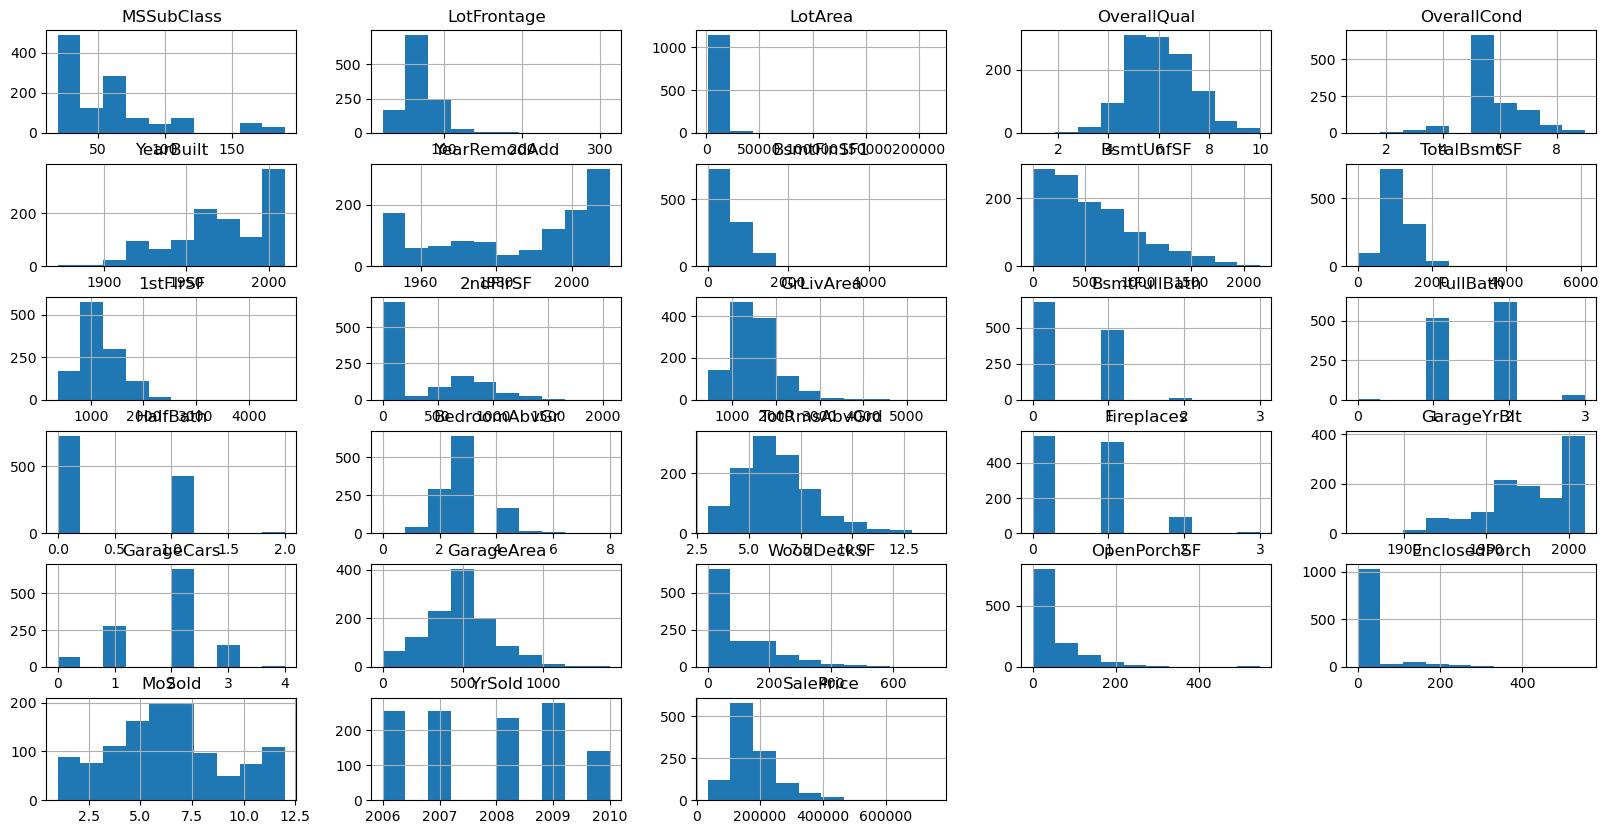

In [66]:
train_data.hist(figsize=(20,10
                        ))

In [72]:
housing_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
